# **Podcast analysis**


This project analyzes a dataset of podcast episodes to understand and predict the average listening time (Listening_Time_minutes) of users.
Each row represents one episode and includes information such as the episode length, genre, host and guest popularity, number of ads, publication day and time, and episode sentiment.

The main goal is to build a regression model that estimates how long listeners remain engaged with an episode. Understanding these patterns can help podcast creators and platforms improve content strategy, optimize episode length, choose the best release schedule, and balance advertising without losing audience attention.

Following the CRISP-DM methodology, the study is structured into:

1.   Data understanding and exploration;
2.   Data preparation and feature engineering;
3.   Model training and evaluation;
4.   Interpretation of results and insights.

This analysis aims not only to achieve accurate predictions but also to reveal the key factors that most influence listener engagement.

# **Data Loading**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:

try:
    path = kagglehub.dataset_download("ysthehurricane/podcast-listening-time-prediction-dataset")
    file_name = 'podcast_dataset.csv'
    file_path = os.path.join(path, file_name)
    df = pd.read_csv(file_path)
    print(f"Dataset caricato con successo da: {file_path}")
except Exception as e:
    print(f"Kaggle download error: {e}. ")
    df = pd.read_csv('podcast_dataset.csv')

100%|██████████| 1.15M/1.15M [00:00<00:00, 33.0MB/s]

Extracting files...


Dataset caricato con successo da: /root/.cache/kagglehub/datasets/ysthehurricane/podcast-listening-time-prediction-dataset/versions/1/podcast_dataset.csv


# **1. Data Understanding and Data Exploration**

In [4]:
print(" First 5 rows:")
df.head()

 First 5 rows:


,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Healthy Living,Episode 77,99.25,Health,21.37,Thursday,Night,70.22,3,Positive,55.158695
1,Mystery Matters,Episode 6,19.43,True Crime,47.19,Friday,Evening,75.15,1,Neutral,7.686559
2,Current Affairs,Episode 1,117.03,News,96.33,Sunday,Night,57.95,3,Neutral,110.064645
3,Mystery Matters,Episode 38,16.97,True Crime,25.73,Monday,Night,24.19,0,Positive,12.000380
4,Humor Hub,Episode 73,83.48,Comedy,76.69,Tuesday,Afternoon,42.31,3,Positive,NaN


In [5]:
print(" Info on columns and data type")
print(df.info())

 Info on columns and data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Podcast_Name                 52500 non-null  object 
 1   Episode_Title                52500 non-null  object 
 2   Episode_Length_minutes       47254 non-null  float64
 3   Genre                        52500 non-null  object 
 4   Host_Popularity_percentage   52500 non-null  float64
 5   Publication_Day              52500 non-null  object 
 6   Publication_Time             52500 non-null  object 
 7   Guest_Popularity_percentage  47242 non-null  float64
 8   Number_of_Ads                52500 non-null  int64  
 9   Episode_Sentiment            52500 non-null  object 
 10  Listening_Time_minutes       47105 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 4.4+ MB
None


**Columns in the dataset description**

*   **Podcast_Name**: Name of the podcast show each episode belongs to.
*   **Episode_Title**: Title of the individual podcast episode.

*  **Episode_Length_minutes**: Total duration of the episode in minutes.

*  **Genre**: Content category or genre of the podcast episode.

*  **Host_Popularity_percentage**: Popularity score of the podcast host, expressed as a percentage (0–100).

*  **Guest_Popularity_percentage**: Popularity score of the guest, if present (0–100).

*  **Publication_Day**: Day of the week the episode was published.

*  **Publication_Time**: Time period of publication within the day (Morning, Afternoon, Evening, Night).

*  **Number_of_Ads**: Number of advertisements contained in the episode.

*  **Episode_Sentiment**: Overall sentiment of the episode’s content (Positive, Neutral, Negative).

*  **Listening_Time_minutes** (target variable): Average listening duration of the episode, measured in minutes.



In [6]:
# Missing values percentage
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().mean()) * 100

print(" Missing values percentage: ")
print(missing_percentage.sort_values(ascending=False))

 Missing values percentage: 
Listening_Time_minutes         10.276190
Guest_Popularity_percentage    10.015238
Episode_Length_minutes          9.992381
Episode_Title                   0.000000
Podcast_Name                    0.000000
Genre                           0.000000
Host_Popularity_percentage      0.000000
Publication_Time                0.000000
Publication_Day                 0.000000
Number_of_Ads                   0.000000
Episode_Sentiment               0.000000
dtype: float64


**Considerations**

As shown above, we have approximately $10\%$ missing values in our target variable (Listening_Time_minutes). Since we are building a supervised model, rows without a target are useless for training. To ensure that our Exploratory Analysis accurately reflects the data we will use for the model, we are removing only these specific rows. This is the only modification we are making at this stage. Missing data in the features (Episode_Length_minutes, Guest_Popularity_percentage) will be handled in Phase 3.

In [7]:
#  Initial dataset inspection
print(f"Original number of rows: {len(df)}")

# Create a new DataFrame 'df_analysis' for modeling and analysis
# We remove only the rows where the target variable is missing,
# since a model cannot be trained or evaluated without the target value.
df_analysis = df.dropna(subset=['Listening_Time_minutes'])

print(f"Number of rows kept for analysis (after removing null target): {len(df_analysis)}")

#  Check for remaining missing values
print("  Remaining Missing Values in the Analysis Dataset  ")
missing_percentage_remaining = (df_analysis.isnull().sum() / len(df_analysis)) * 100
print(
    missing_percentage_remaining[missing_percentage_remaining > 0]
    .sort_values(ascending=False)
)

Original number of rows: 52500
Number of rows kept for analysis (after removing null target): 47105
  Remaining Missing Values in the Analysis Dataset  
Guest_Popularity_percentage    10.018045
Episode_Length_minutes          9.967095
dtype: float64


In [8]:
df_analysis.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,42410.000000,47105.000000,42386.000000,47105.000000,47105.000000
mean,62.912430,60.163444,50.083213,1.500096,45.560293
std,33.152897,23.153815,28.869452,1.116763,27.182454
min,5.000000,20.000000,0.010000,0.000000,0.000000
25%,34.340000,39.970000,25.090000,1.000000,23.286442
50%,62.970000,60.320000,50.120000,1.000000,43.555490
75%,91.667500,80.310000,75.110000,2.000000,64.953793
max,120.000000,100.000000,100.000000,3.000000,119.970000


## **Podcast and episodes**

  Dataset Overview  
Total episodes: 52500
Unique podcasts: 48
 Episodes per genre:
Genre
Business      5559
Health        5539
Sports        5521
Lifestyle     5499
Comedy        5447
True Crime    5428
Technology    5418
News          5324
Music         4383
Education     4382
Name: count, dtype: int64


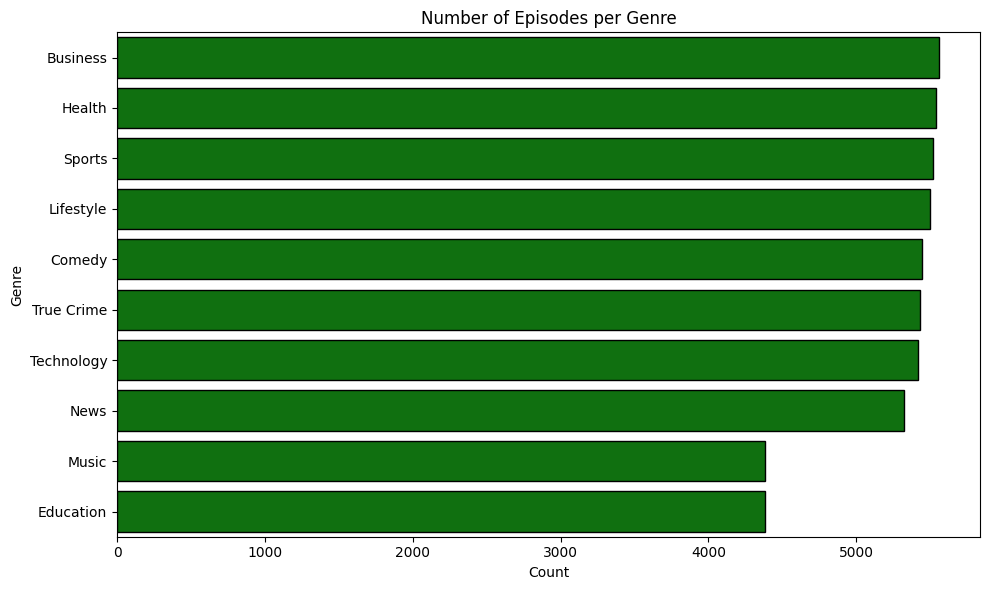

In [9]:
print("  Dataset Overview  ")
print(f"Total episodes: {len(df)}")
print(f"Unique podcasts: {df['Podcast_Name'].nunique()}")

# Episodes per genre
episodes_per_genre = df['Genre'].value_counts()
print(" Episodes per genre:")
print(episodes_per_genre)

# Visualization — Episodes per Genre
plt.figure(figsize=(10, 6))
sns.barplot(
    x=episodes_per_genre.values,
    y=episodes_per_genre.index,
    color='green',
    edgecolor='black'
)
plt.title('Number of Episodes per Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

## **Target variable: Listening_Time_minutes**

  Target Variable: Listening_Time_minutes  
count    47105.000000
mean        45.560293
std         27.182454
min          0.000000
25%         23.286442
50%         43.555490
75%         64.953793
max        119.970000
Name: Listening_Time_minutes, dtype: float64


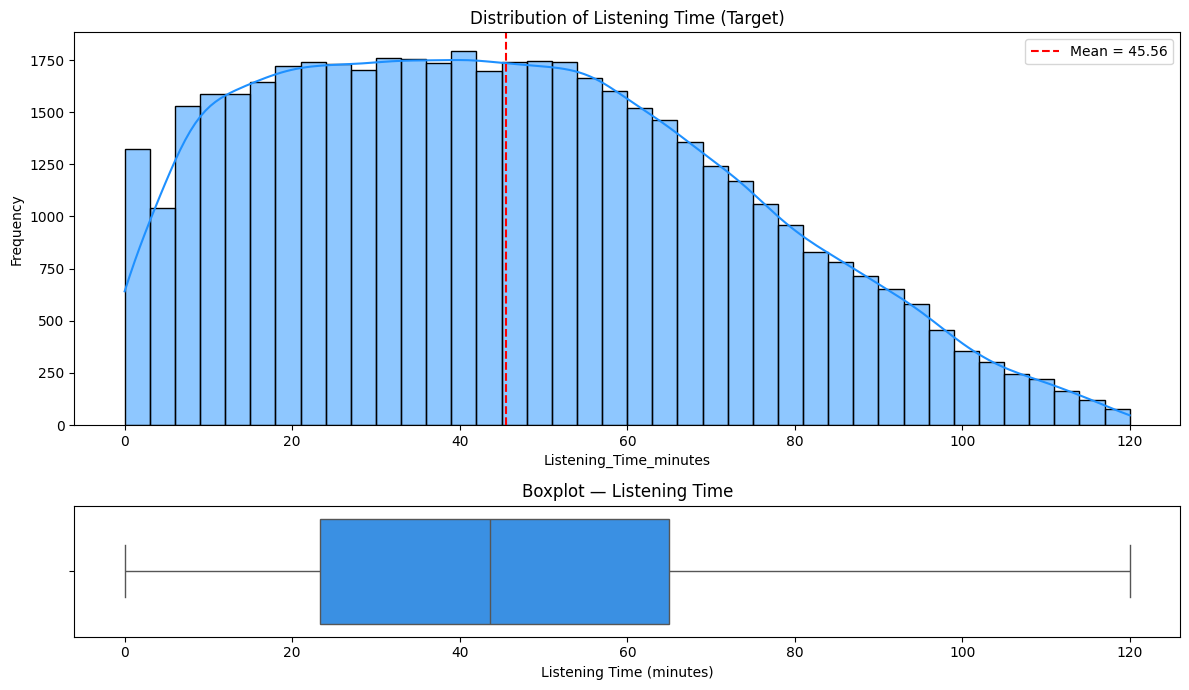

In [10]:
print("  Target Variable: Listening_Time_minutes  ")
print(df_analysis['Listening_Time_minutes'].describe())

# Histogram + Boxplot
fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(12, 7),
                                     gridspec_kw={'height_ratios': [3, 1]})

sns.histplot(df_analysis['Listening_Time_minutes'], bins=40, kde=True,
             color='dodgerblue', ax=ax_hist)
ax_hist.axvline(df_analysis['Listening_Time_minutes'].mean(),
                color='red', linestyle='--',
                label=f"Mean = {df_analysis['Listening_Time_minutes'].mean():.2f}")
ax_hist.legend()
ax_hist.set_title('Distribution of Listening Time (Target)')
ax_hist.set_ylabel('Frequency')

sns.boxplot(x=df_analysis['Listening_Time_minutes'], color='dodgerblue', ax=ax_box)
ax_box.set_title('Boxplot — Listening Time')
ax_box.set_xlabel('Listening Time (minutes)')

plt.tight_layout()
plt.show()


## **Numerical variables**

  Correlation Matrix  
                             Episode_Length_minutes  \
Episode_Length_minutes                     1.000000   
Host_Popularity_percentage                 0.001553   
Guest_Popularity_percentage                0.001310   
Number_of_Ads                              0.010979   
Listening_Time_minutes                     0.902019   

                             Host_Popularity_percentage  \
Episode_Length_minutes                         0.001553   
Host_Popularity_percentage                     1.000000   
Guest_Popularity_percentage                    0.003590   
Number_of_Ads                                 -0.006323   
Listening_Time_minutes                         0.047143   

                             Guest_Popularity_percentage  Number_of_Ads  \
Episode_Length_minutes                          0.001310       0.010979   
Host_Popularity_percentage                      0.003590      -0.006323   
Guest_Popularity_percentage                     1.000000       0.0

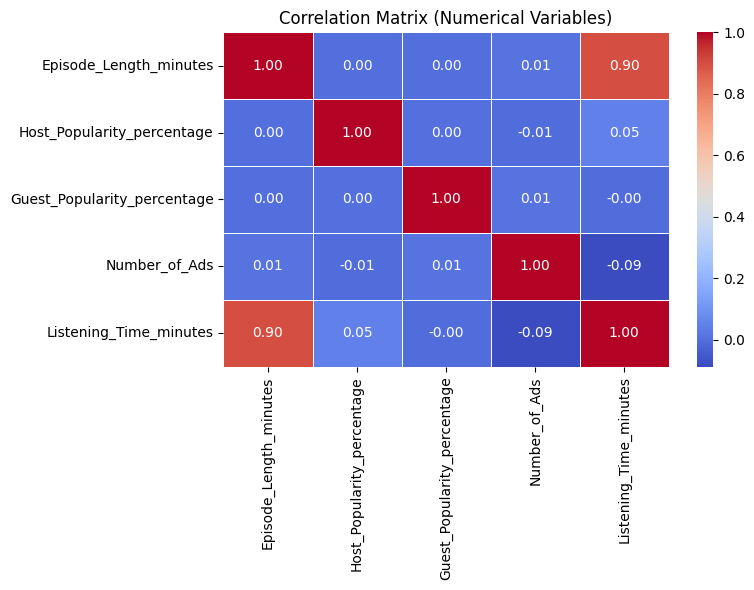

In [11]:
num_cols = [
    'Episode_Length_minutes',
    'Host_Popularity_percentage',
    'Guest_Popularity_percentage',
    'Number_of_Ads',
    'Listening_Time_minutes'
]

corr = df_analysis[num_cols].corr()
print("  Correlation Matrix  ")
print(corr)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (Numerical Variables)')
plt.tight_layout()
plt.show()


## **Categorical Variables Analysis**

Average Listening Time by Genre 
Genre
Technology    47.255822
True Crime    46.551083
Music         46.232841
Business      45.871449
Health        45.378580
Education     45.222056
Lifestyle     45.053280
Sports        44.943117
News          44.630184
Comedy        44.524182
Name: Listening_Time_minutes, dtype: float64


/tmp/ipython-input-2839179580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg.values, y=genre_avg.index, palette='viridis')


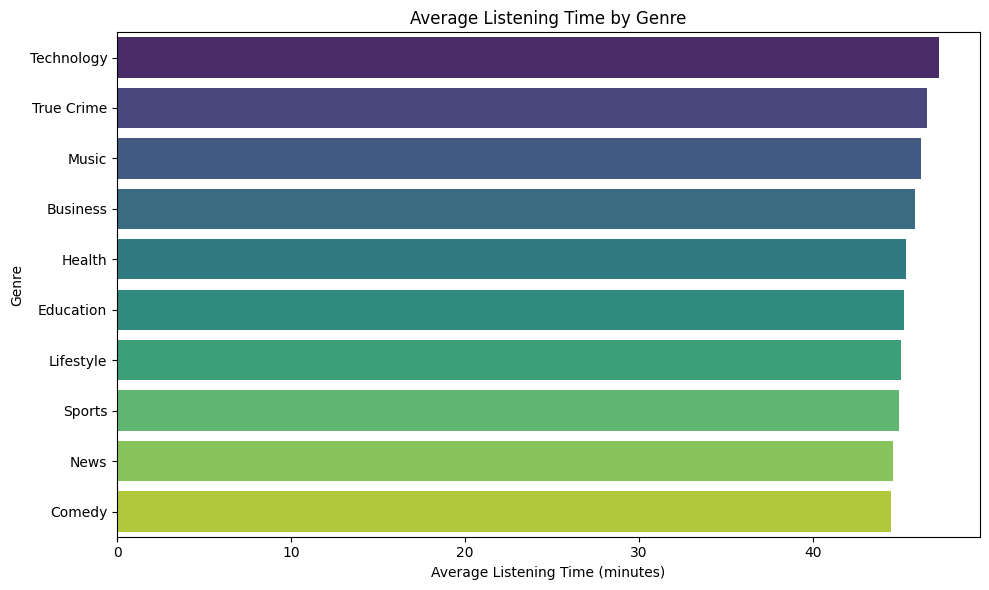

  Average Listening Time by Publication Day  
Publication_Day
Monday       45.552466
Tuesday      46.273659
Wednesday    45.376476
Thursday     45.545049
Friday       45.430487
Saturday     45.194999
Sunday       45.547599
Name: Listening_Time_minutes, dtype: float64


/tmp/ipython-input-2839179580.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_avg.index, y=day_avg.values, palette='pastel')


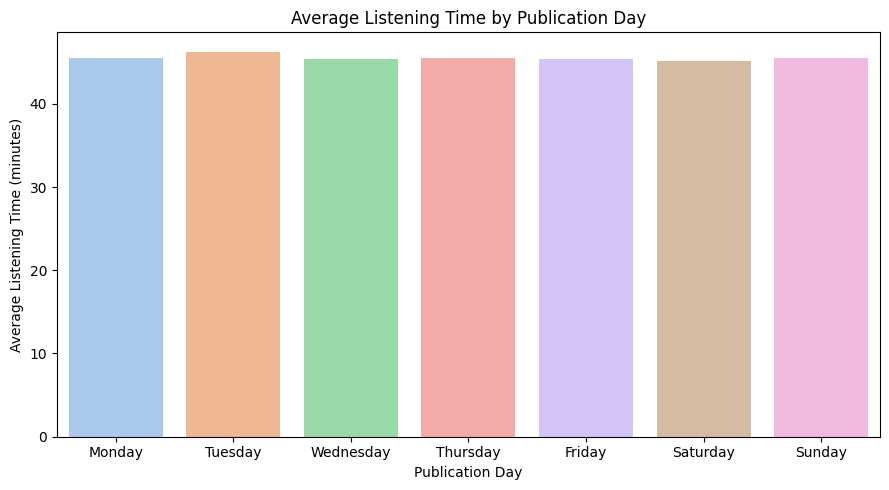

In [12]:
print("Average Listening Time by Genre ")
genre_avg = df_analysis.groupby('Genre')['Listening_Time_minutes'].mean().sort_values(ascending=False)
print(genre_avg)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_avg.values, y=genre_avg.index, palette='viridis')
plt.title('Average Listening Time by Genre')
plt.xlabel('Average Listening Time (minutes)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

print("  Average Listening Time by Publication Day  ")
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_avg = df_analysis.groupby('Publication_Day')['Listening_Time_minutes'].mean().reindex(day_order)
print(day_avg)

plt.figure(figsize=(9, 5))
sns.barplot(x=day_avg.index, y=day_avg.values, palette='pastel')
plt.title('Average Listening Time by Publication Day')
plt.xlabel('Publication Day')
plt.ylabel('Average Listening Time (minutes)')
plt.tight_layout()
plt.show()

## **Episode Length vs Listening Time**


Relationship: Episode Length vs Listening Time


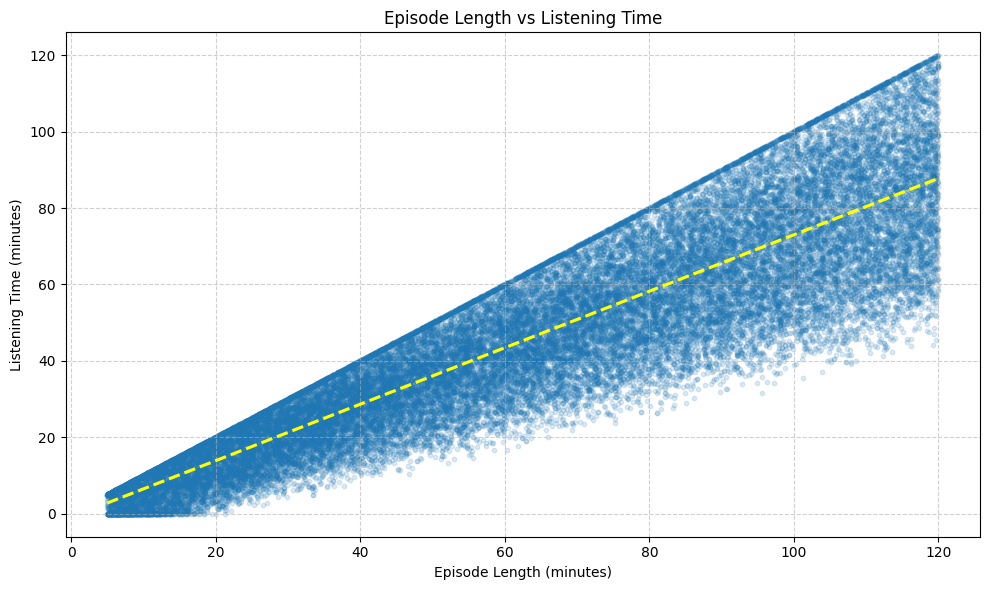

In [13]:
print("Relationship: Episode Length vs Listening Time")
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Episode_Length_minutes',
    y='Listening_Time_minutes',
    data=df_analysis,
    scatter_kws={'alpha':0.15, 's':10},
    line_kws={'color':'yellow', 'linestyle':'--'}
)
plt.title('Episode Length vs Listening Time')
plt.xlabel('Episode Length (minutes)')
plt.ylabel('Listening Time (minutes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## **Number of Ads vs Listening Time**

 Average Listening Time by Number of Ads
   Number_of_Ads  Listening_Time_minutes
0              0               48.525459
1              1               47.030151
2              2               44.321965
3              3               42.361383


/tmp/ipython-input-913829523.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number_of_Ads', y='Listening_Time_minutes', data=ads_avg, palette='coolwarm_r')


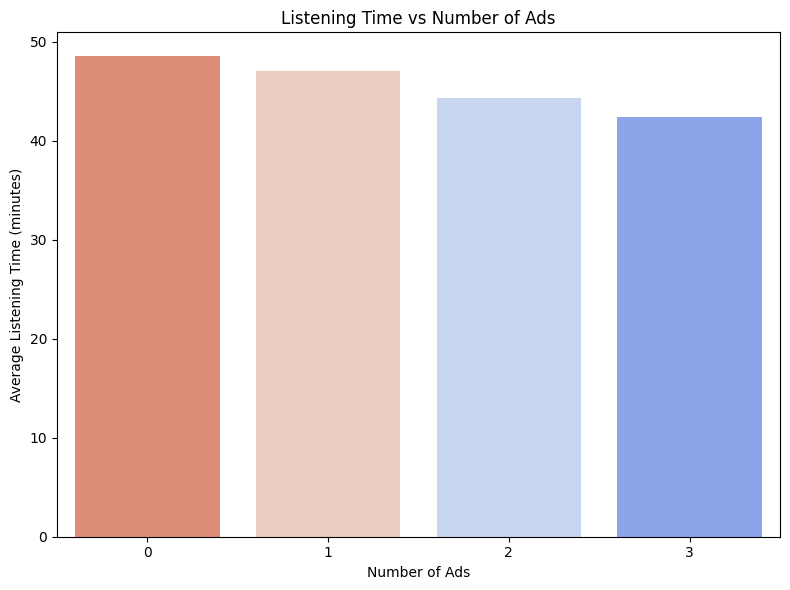

In [14]:
print(" Average Listening Time by Number of Ads")
ads_avg = df_analysis.groupby('Number_of_Ads')['Listening_Time_minutes'].mean().reset_index()
print(ads_avg)

plt.figure(figsize=(8, 6))
sns.barplot(x='Number_of_Ads', y='Listening_Time_minutes', data=ads_avg, palette='coolwarm_r')
plt.title('Listening Time vs Number of Ads')
plt.xlabel('Number of Ads')
plt.ylabel('Average Listening Time (minutes)')
plt.tight_layout()
plt.show()


## **Outlier Analysis: Listening Time vs Episode Length**

Outlier Check: Listening Time exceeding Episode Length
Total episodes analyzed: 47105
Potential outliers detected: 0 (0.00%)


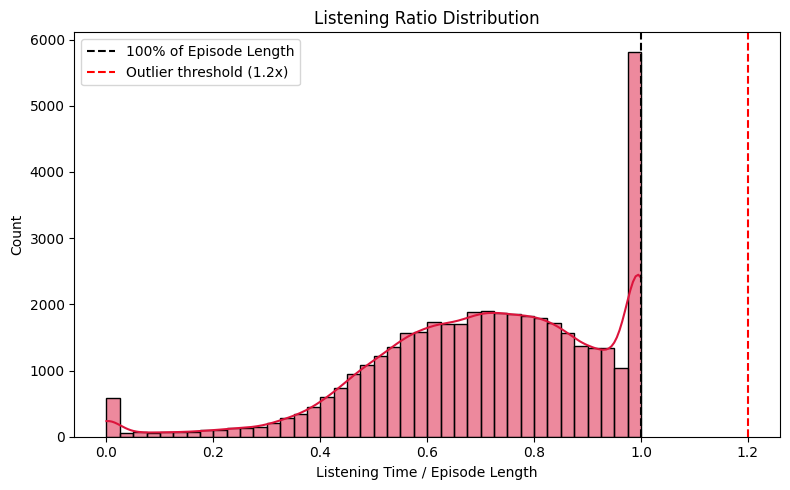

In [15]:

print("Outlier Check: Listening Time exceeding Episode Length")

# Compute ratio between listening time and episode length
df_outlier_check = df_analysis.copy()
df_outlier_check['Listening_Ratio'] = (
    df_outlier_check['Listening_Time_minutes'] / df_outlier_check['Episode_Length_minutes']
)

# Filter potential outliers (listeners exceeding 120% of episode length)
outliers = df_outlier_check[df_outlier_check['Listening_Ratio'] > 1.2]

print(f"Total episodes analyzed: {len(df_outlier_check)}")
print(f"Potential outliers detected: {len(outliers)} "
      f"({(len(outliers) / len(df_outlier_check)) * 100:.2f}%)")

# Quick visualization (optional)
plt.figure(figsize=(8, 5))
sns.histplot(df_outlier_check['Listening_Ratio'], bins=40, kde=True, color='crimson')
plt.axvline(1.0, color='black', linestyle='--', label='100% of Episode Length')
plt.axvline(1.2, color='red', linestyle='--', label='Outlier threshold (1.2x)')
plt.title('Listening Ratio Distribution')
plt.xlabel('Listening Time / Episode Length')
plt.legend()
plt.tight_layout()
plt.show()

## **Summary of Empirical Findings**
EDA supports three core insights that guide feature design and model choice:


*   **Duration is the dominant driver of listening**: keep both raw and log-transformed versions to support different model families.
*  **Ad density negatively correlates with listening**, beyond simple ad counts adding both Ads_per_Minute and Has_Ads captures intensive and extensive margins.
*  **Popularity and timing play secondary but consistent roles**, best captured via a compact interaction term and lightweight temporal encodings.

These observations motivate comparing linear baselines against a nonlinear ensemble. In what follows, we formalize the cleaning and engineering decisions and quantify their effects through cross-validated modeling.


# **2. Data Preparation and Feature Engineering**





## **2.1 Data Preparation**

### **Missing Values**



In [16]:
df_prep = df_analysis.copy()
print(f"DataFrame 'df_prep' created with {len(df_prep)} rows.")

# Impute Guest Popularity (median)
guest_median = df_prep['Guest_Popularity_percentage'].median()
df_prep['Guest_Popularity_percentage'] = df_prep['Guest_Popularity_percentage'].fillna(guest_median)

# Impute Episode Length (median)
length_median = df_prep['Episode_Length_minutes'].median()
df_prep['Episode_Length_minutes'] = df_prep['Episode_Length_minutes'].fillna(length_median)

print("Missing values imputed using median strategy.")


DataFrame 'df_prep' created with 47105 rows.
Missing values imputed using median strategy.


### **Outlier Handling**

In [17]:
print("  Outlier Detection & Removal  ")

# Compute Listening Ratio (Listening Time / Episode Length)
df_prep['Listening_Ratio'] = (
    df_prep['Listening_Time_minutes'] / df_prep['Episode_Length_minutes']
)

# Define tolerance threshold: episodes exceeding 120% of their duration
ratio_threshold = 1.2
outliers = df_prep[df_prep['Listening_Ratio'] > ratio_threshold]

print(f"Detected {len(outliers)} potential outliers "
      f"({(len(outliers) / len(df_prep)) * 100:.2f}% of total data).")

# Remove outliers
df_prep = df_prep[df_prep['Listening_Ratio'] <= ratio_threshold].copy()
print(f"Dataset after outlier removal: {len(df_prep)} rows retained.")

# Remove Listening_Ratio to prevent data leakage in modeling phase
df_prep.drop(columns=['Listening_Ratio'], inplace=True, errors='ignore')
print("Removed 'Listening_Ratio' column (used only for outlier detection).")


  Outlier Detection & Removal  
Detected 734 potential outliers (1.56% of total data).
Dataset after outlier removal: 46371 rows retained.
Removed 'Listening_Ratio' column (used only for outlier detection).


### **Consistency Flag**

In [18]:
df_prep['Flag_Inconsistent_Listening'] = (
    df_prep['Listening_Time_minutes'] > df_prep['Episode_Length_minutes']
).astype(int)

print(f"Added flag for inconsistent listening "
      f"({df_prep['Flag_Inconsistent_Listening'].sum()} episodes flagged).")

# Quick check
print("Data Preparation completed")
print(f"Final shape: {df_prep.shape[0]} rows, {df_prep.shape[1]} columns")


Added flag for inconsistent listening (542 episodes flagged).
Data Preparation completed
Final shape: 46371 rows, 12 columns


## **2.2 Feature Engineering**

### **Advertising Features**

In [19]:
print("Creating advertising features...")

df_prep['Ads_per_Minute'] = np.where(
    df_prep['Episode_Length_minutes'] > 0,
    df_prep['Number_of_Ads'] / df_prep['Episode_Length_minutes'],
    np.nan
)

df_prep['Has_Ads'] = (df_prep['Number_of_Ads'] > 0).astype(int)
print("Features created: ['Ads_per_Minute', 'Has_Ads']")


Creating advertising features...
Features created: ['Ads_per_Minute', 'Has_Ads']


### **Popularity interactions**

In [20]:
print("Creating popularity interaction feature...")
df_prep['Pop_Interaction'] = (
    df_prep['Host_Popularity_percentage'] * df_prep['Guest_Popularity_percentage']
) / 10000.0

print("Feature created: ['Pop_Interaction']")

Creating popularity interaction feature...
Feature created: ['Pop_Interaction']


### **Episode Length Transformation**

In [21]:
print("Applying log transformation to episode length...")
df_prep['Log_Length'] = np.log1p(
    np.clip(df_prep['Episode_Length_minutes'], a_min=0, a_max=None)
)
print("Feature created: ['Log_Length']")

Applying log transformation to episode length...
Feature created: ['Log_Length']


### **Temporal Features**


In [22]:

print("Encoding temporal signals...")

# Encode publication time (ordinal)
time_map = {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}
df_prep['Pub_Time_Enc'] = df_prep['Publication_Time'].map(time_map)

# Weekend flag
df_prep['Is_Weekend'] = df_prep['Publication_Day'].isin(
    ['Saturday', 'Sunday']
).astype(int)

print("Features created: ['Pub_Time_Enc', 'Is_Weekend']")

Encoding temporal signals...
Features created: ['Pub_Time_Enc', 'Is_Weekend']


### **Summary of engineered features**

In [23]:
summary_cols = [

    'Ads_per_Minute',
    'Has_Ads',
    'Pop_Interaction',
    'Log_Length',
    'Pub_Time_Enc',
    'Is_Weekend',
    'Flag_Inconsistent_Listening'
]

print("Descriptive Statistics for Engineered Features")
print(df_prep[summary_cols].describe().to_markdown(floatfmt=".3f"))

print(f"Feature Engineering completed. Final dataset ready for modeling:"
      f"{df_prep.shape[0]} rows × {df_prep.shape[1]} columns.")


Descriptive Statistics for Engineered Features
|       |   Ads_per_Minute |   Has_Ads |   Pop_Interaction |   Log_Length |   Pub_Time_Enc |   Is_Weekend |   Flag_Inconsistent_Listening |
|:------|-----------------:|----------:|------------------:|-------------:|---------------:|-------------:|------------------------------:|
| count |        46371.000 | 46371.000 |         46371.000 |    46371.000 |      46371.000 |    46371.000 |                     46371.000 |
| mean  |            0.039 |     0.752 |             0.302 |        3.979 |          1.511 |        0.286 |                         0.012 |
| std   |            0.059 |     0.432 |             0.212 |        0.675 |          1.120 |        0.452 |                         0.107 |
| min   |            0.000 |     0.000 |             0.000 |        1.792 |          0.000 |        0.000 |                         0.000 |
| 25%   |            0.008 |     1.000 |             0.134 |        3.636 |          1.000 |        0.000 |      

In [24]:
# Identify newly engineered columns (vs. original df)
new_cols = [c for c in df_prep.columns if c not in df.columns]
print(f"Added engineered features ({len(new_cols)}):")
print(new_cols)

# Sanity check: only the features we decided to keep
check_cols = [
    'Ads_per_Minute',
    'Has_Ads',
    'Pop_Interaction',
    'Log_Length',
    'Pub_Time_Enc',
    'Is_Weekend',
    'Listening_Ratio',
    'Flag_Inconsistent_Listening'

]
present = [c for c in check_cols if c in df_prep.columns]

print("Features present in df_prep (final feature set):")
print(present)

# Quick data preview (useful for both .py and notebooks)
print("Preview of prepared data (first 5 rows):")
try:
    from IPython.display import display
    display(df_prep.head())
except Exception:
    print(df_prep.head().to_markdown(floatfmt=".3f"))


Added engineered features (7):
['Flag_Inconsistent_Listening', 'Ads_per_Minute', 'Has_Ads', 'Pop_Interaction', 'Log_Length', 'Pub_Time_Enc', 'Is_Weekend']
Features present in df_prep (final feature set):
['Ads_per_Minute', 'Has_Ads', 'Pop_Interaction', 'Log_Length', 'Pub_Time_Enc', 'Is_Weekend', 'Flag_Inconsistent_Listening']
Preview of prepared data (first 5 rows):


,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Flag_Inconsistent_Listening,Ads_per_Minute,Has_Ads,Pop_Interaction,Log_Length,Pub_Time_Enc,Is_Weekend
0,Healthy Living,Episode 77,99.25,Health,21.37,Thursday,Night,70.22,3,Positive,55.158695,0,0.030227,1,0.150060,4.607667,3,0
1,Mystery Matters,Episode 6,19.43,True Crime,47.19,Friday,Evening,75.15,1,Neutral,7.686559,0,0.051467,1,0.354633,3.017004,2,0
2,Current Affairs,Episode 1,117.03,News,96.33,Sunday,Night,57.95,3,Neutral,110.064645,0,0.025634,1,0.558232,4.770939,3,1
3,Mystery Matters,Episode 38,16.97,True Crime,25.73,Monday,Night,24.19,0,Positive,12.000380,0,0.000000,0,0.062241,2.888704,3,0
5,Money Matters,Episode 87,28.06,Business,22.02,Wednesday,Morning,50.12,1,Neutral,13.913024,0,0.035638,1,0.110364,3.369363,0,0


## **Summary**
The data preparation and feature engineering stage transformed raw, heterogeneous podcast metadata into a coherent analytical structure suitable for machine learning.  
Systematic cleaning and controlled imputation ensured completeness and statistical stability; encoding and scaling harmonized data across types; and feature design injected behavioral meaning aligned with domain intuition.  
This structured foundation allows subsequent models to focus on genuine signal extraction rather than data artifacts, upholding the CRISP-DM principle of ``garbage in, garbage out'' prevention.

#**3. Model training and evaluation**

## **Define Target and Feature Set**

In [25]:
# Target, groups, and feature matrix (clean & leakage-safe)
print("Setting up target, groups, and feature matrix...")

TARGET_COL = 'Listening_Time_minutes'
GROUP_COL  = 'Podcast_Name'

# 1) Guard: ensure target exists and drop rows with missing target
assert TARGET_COL in df_prep.columns, f"Target column '{TARGET_COL}' not found in df_prep."
df_mod = df_prep.copy()
n_before = len(df_mod)
df_mod = df_mod[df_mod[TARGET_COL].notna()].copy()
n_dropped = n_before - len(df_mod)
if n_dropped > 0:
    print(f"Dropped {n_dropped} rows with missing target.")

# 2) Separate target and groups
y = df_mod[TARGET_COL].copy()
groups = df_mod[GROUP_COL].copy() if GROUP_COL in df_mod.columns else None

# 3) Build feature matrix and drop columns that should not be modeled
#    - ID/text-like columns
drop_cols = ['Episode_Title', 'Description', GROUP_COL, 'Listening_Ratio', TARGET_COL]
X = df_mod.drop(columns=[c for c in drop_cols if c in df_mod.columns], errors='ignore').copy()

# 4) Sanity checks & preview
print(f"Feature matrix shape: {X.shape}")
print(f"   Target shape: {y.shape}")
if groups is not None:
    print(f"   Groups available: {groups.nunique()} unique values in '{GROUP_COL}'.")

# Quick peek at columns
sample_cols = X.columns[:10].tolist()
print("Sample feature columns:", sample_cols)


Setting up target, groups, and feature matrix...
Feature matrix shape: (46371, 15)
   Target shape: (46371,)
   Groups available: 48 unique values in 'Podcast_Name'.
Sample feature columns: ['Episode_Length_minutes', 'Genre', 'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment', 'Flag_Inconsistent_Listening', 'Ads_per_Minute']


## **Train/Test Split**

In [26]:
## Train/Test Split
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
TEST_SIZE = 0.20

print("Train/Test Split")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True
)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")


Train/Test Split
Train shape: (37096, 15)
Test shape: (9275, 15)


## **Identify Column Types**

In [27]:
print("Identifying feature types...")

# Explicit numeric / categorical separation
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=['number']).columns.tolist()

print(f"Numeric columns: {len(num_cols)}")
print(f"Categorical columns: {len(cat_cols)}")
print("Example numeric columns:", num_cols[:5])
print("Example categorical columns:", cat_cols[:5])

# Quick sanity check
if len(num_cols) == 0:
    print("Warning: No numeric columns detected!")
if len(cat_cols) == 0:
    print("Warning: No categorical columns detected!")


Identifying feature types...
Numeric columns: 11
Categorical columns: 4
Example numeric columns: ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Flag_Inconsistent_Listening']
Example categorical columns: ['Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']


## **Build Preprocessing Pipeline**

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

print("Building preprocessing pipeline")

#  Numeric preprocessing: median imputation + standard scaling
numeric_tf = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#  Categorical preprocessing: mode imputation + one-hot encoding
categorical_tf = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

#  Combine numeric and categorical pipelines
preprocessor = ColumnTransformer([
    ('num', numeric_tf, num_cols),
    ('cat', categorical_tf, cat_cols)
])

print("Preprocessing pipeline ready.")
print(f"   Numeric features: {len(num_cols)} | Categorical features: {len(cat_cols)}")

Building preprocessing pipeline
Preprocessing pipeline ready.
   Numeric features: 11 | Categorical features: 4


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def eval_and_print(name, y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    # Calculate RMSE by taking the square root of the mean squared error
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    print(f" {name} — Test metrics: MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")
    return {'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2}



## **Model Training**

##**Linear Regression**

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

print("Training Model: Linear Regression")

model_linreg = Pipeline([
    ('pre', preprocessor),
    ('reg', LinearRegression())
])
model_linreg.fit(X_train, y_train)
y_pred_lin = model_linreg.predict(X_test)
res_lin = eval_and_print("LinearRegression", y_test, y_pred_lin)



Training Model: Linear Regression
 LinearRegression — Test metrics: MAE=9.541 | RMSE=12.359 | R²=0.785


##**Lasso Regression**

In [31]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Training Model: Lasso (simple, no CV)")

# Safe sparse→dense conversion (in case preprocessor output is sparse)
to_dense = FunctionTransformer(
    lambda X: X.toarray() if hasattr(X, "toarray") else X,
    accept_sparse=True
)

# Build pipeline
lasso_pipe = Pipeline(steps=[
    ('pre', preprocessor),
    ('to_dense', to_dense),
    ('reg', Lasso(alpha=0.06, max_iter=50000, tol=1e-3, random_state=42))  # fixed alpha
])

# Fit model
lasso_pipe.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso_pipe.predict(X_test)

# Evaluate
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso (simple) — MAE: {mae_lasso:.4f} | RMSE: {rmse_lasso:.4f} | R²: {r2_lasso:.4f}")

# Define res_lasso dictionary to be consistent with other model results
res_lasso = {'Model': 'Lasso (simple, no CV)', 'MAE': mae_lasso, 'RMSE': rmse_lasso, 'R2': r2_lasso}


Training Model: Lasso (simple, no CV)
Lasso (simple) — MAE: 9.5244 | RMSE: 12.3604 | R²: 0.7851


##**Random Forest**

In [33]:
from sklearn.ensemble import RandomForestRegressor

print(" Training Model: Random Forest ")

# Define the baseline pipeline
rf_pipe = Pipeline([
    ('pre', preprocessor),
    ('reg', RandomForestRegressor(
        n_estimators=600,        # stable baseline
        max_depth=16,            # prevents overfitting
        min_samples_split=4,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    ))
])

# Train
rf_pipe.fit(X_train, y_train)

# Evaluate on test set
y_pred_rf = rf_pipe.predict(X_test)
res_rf = eval_and_print("RandomForest", y_test, y_pred_rf)

# Quick feedback
print("Feature count after preprocessing:", len(rf_pipe.named_steps['pre'].get_feature_names_out()))
print("Random Forest training complete.")

 Training Model: Random Forest 
 RandomForest — Test metrics: MAE=9.093 | RMSE=11.619 | R²=0.810
Feature count after preprocessing: 35
Random Forest training complete.


### **Feature Importance**

 Top 15 feature importances (Random Forest):
                         Feature  Importance
                 num__Log_Length    0.374111
     num__Episode_Length_minutes    0.369054
             num__Ads_per_Minute    0.148448
 num__Host_Popularity_percentage    0.017092
num__Flag_Inconsistent_Listening    0.015558
            num__Pop_Interaction    0.013442
num__Guest_Popularity_percentage    0.012998
              num__Number_of_Ads    0.010719
                    num__Has_Ads    0.003947
               num__Pub_Time_Enc    0.002996
 cat__Episode_Sentiment_Positive    0.002076
  cat__Episode_Sentiment_Neutral    0.001526
 cat__Episode_Sentiment_Negative    0.001514
                 num__Is_Weekend    0.001432
   cat__Publication_Time_Evening    0.001405


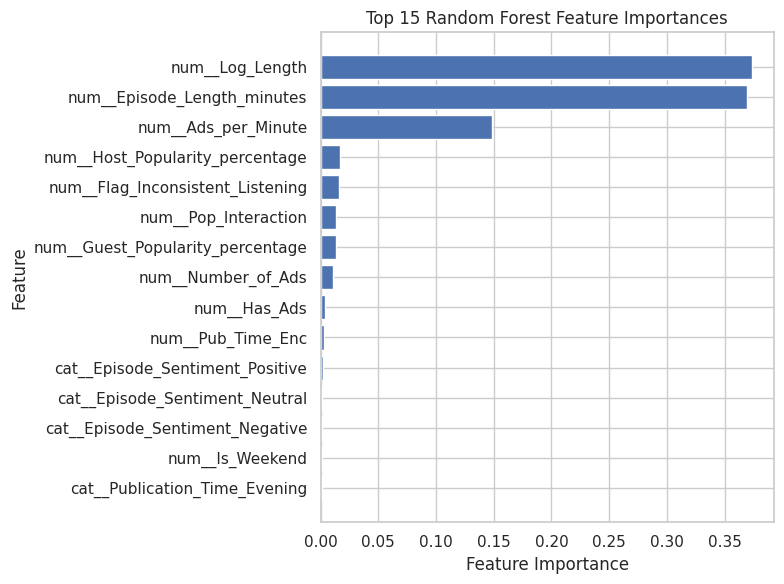

In [38]:
try:
    # Retrieve preprocessing and trained model
    pre = rf_pipe.named_steps['pre']
    reg = rf_pipe.named_steps['reg']

    # Get feature names (post-preprocessing)
    if hasattr(pre, "get_feature_names_out"):
        feat_names = pre.get_feature_names_out()
    else:
        feat_names = np.array([f"feat_{i}" for i in range(reg.n_features_in_)])

    # Extract and sort importances
    importances = reg.feature_importances_
    fi = (pd.DataFrame({'Feature': feat_names, 'Importance': importances})
            .sort_values('Importance', ascending=False)
            .reset_index(drop=True))

    print(" Top 15 feature importances (Random Forest):")
    print(fi.head(15).to_string(index=False))

except Exception as e:
    print(f"Could not extract RF importances: {e}")
    fi = None

#  Plot top features
if fi is not None and not fi.empty:
    top_n = 15
    plt.figure(figsize=(8, 6))
    plt.barh(fi['Feature'][:top_n][::-1], fi['Importance'][:top_n][::-1])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title(f"Top {top_n} Random Forest Feature Importances")
    plt.tight_layout()
    plt.show()
else:
    print("Skipping feature-importance plot (no importances available).")


##**Compare Models**

In [39]:
results = pd.DataFrame({
    'Model': ['Linear', 'Lasso', 'RandomForest'],
    'MAE':   [res_lin['MAE'], res_lasso['MAE'], res_rf['MAE']],
    'RMSE':  [res_lin['RMSE'], res_lasso['RMSE'], res_rf['RMSE']],
    'R2':    [res_lin['R2'], res_lasso['R2'], res_rf['R2']]
}).sort_values('MAE')

display(results)

,Model,MAE,RMSE,R2
2,RandomForest,9.093192,11.618932,0.810076
1,Lasso,9.524398,12.360434,0.785061
0,Linear,9.541237,12.358990,0.785111


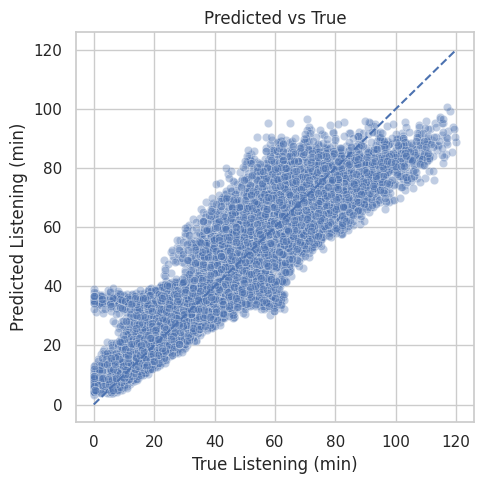

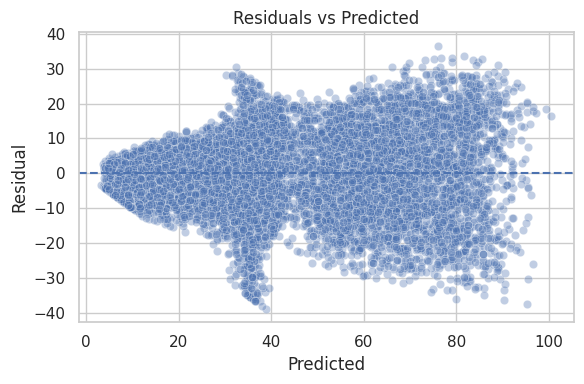

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Choose the best predictions (edit if another model wins)
# Options: y_pred_lin, y_pred_ridge, y_pred_lasso, y_pred_enet, y_pred_rf, y_pred_xgb
y_pred_best = y_pred_rf

# Predicted vs True
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.35)
lims = [0, max(y_test.max(), y_pred_best.max())]
plt.plot(lims, lims, ls='--')
plt.xlabel('True Listening (min)')
plt.ylabel('Predicted Listening (min)')
plt.title('Predicted vs True')
plt.tight_layout()
plt.show()

# Residuals
res = y_test - y_pred_best
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_best, y=res, alpha=0.35)
plt.axhline(0, ls='--')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted')
plt.tight_layout()
plt.show()


## **Feature importance and selection**

In [43]:
# Minimal block: apply importance threshold to existing `fi` DataFrame
# then infer raw columns (from post-OHE names) and build `preprocessor_reduced`.
# Assumes `fi` (DataFrame with columns "Feature" and "Importance") already exists.

# 1) Basic check (fi must already exist)
if 'fi' not in globals() or fi is None or fi.empty:
    raise RuntimeError("fi is not available. Run the RandomForest importance block first to populate `fi`.")

# 2) Threshold selection (1% importance)
IMPORTANCE_THRESHOLD = 0.01
selected_features = fi.loc[fi['Importance'] >= IMPORTANCE_THRESHOLD, 'Feature'].tolist()
print(f"Selected {len(selected_features)} post-features (importance >= {IMPORTANCE_THRESHOLD}):")
print(selected_features[:50])

# 3) Split post-features by expected prefixes 'num__' / 'cat__'
sel_num_post = [f for f in selected_features if f.startswith("num__")]
sel_cat_post = [f for f in selected_features if f.startswith("cat__")]

# 4) Map post-feature names back to raw column names
selected_num_raw = sorted({f.split("__", 1)[1] for f in sel_num_post})

def base_cat_name(post_name):
    # post_name example: 'cat__Publication_Time_Evening' -> returns 'Publication_Time'
    tmp = post_name.split("__", 1)[1]
    return tmp.split("_", 1)[0] if "_" in tmp else tmp

selected_cat_raw = sorted({base_cat_name(f) for f in sel_cat_post})

print(f"[FS] Raw numeric inferred: {selected_num_raw}")
print(f"[FS] Raw categorical inferred: {selected_cat_raw}")

# 5) Build reduced preprocessor if there are any inferred raw columns
if not selected_num_raw and not selected_cat_raw:
    print("No raw columns inferred from selected post-features; skipping reduced preprocessor creation.")
    preprocessor_reduced = None
else:

    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False))
    ])

    transformers = []
    if selected_num_raw:
        transformers.append(("num", numeric_transformer, selected_num_raw))
    if selected_cat_raw:
        transformers.append(("cat", categorical_transformer, selected_cat_raw))

    preprocessor_reduced = ColumnTransformer(transformers=transformers, remainder="drop")
    print(f"[FS] Reduced preprocessor configured with {len(selected_num_raw)} numeric and {len(selected_cat_raw)} categorical raw columns.")

Selected 8 post-features (importance >= 0.01):
['num__Log_Length', 'num__Episode_Length_minutes', 'num__Ads_per_Minute', 'num__Host_Popularity_percentage', 'num__Flag_Inconsistent_Listening', 'num__Pop_Interaction', 'num__Guest_Popularity_percentage', 'num__Number_of_Ads']
[FS] Raw numeric inferred: ['Ads_per_Minute', 'Episode_Length_minutes', 'Flag_Inconsistent_Listening', 'Guest_Popularity_percentage', 'Host_Popularity_percentage', 'Log_Length', 'Number_of_Ads', 'Pop_Interaction']
[FS] Raw categorical inferred: []
[FS] Reduced preprocessor configured with 8 numeric and 0 categorical raw columns.


## **Cross Validation**

In [44]:
# CV & Reporting Utilities
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold

# 5-fold CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_report(search, top_n=5):
    """Return a tidy DataFrame of the top models from a fitted Grid/Randomized search."""
    df = pd.DataFrame(search.cv_results_)
    cols = [c for c in df.columns if c.startswith('param_')] + [
        'mean_test_score', 'std_test_score', 'rank_test_score'
    ]
    out = (df[cols]
           .sort_values('rank_test_score')
           .assign(mean_test_score=lambda d: -d['mean_test_score'])  # flip sign (we use negative losses)
           .rename(columns={'mean_test_score':'CV_MAE', 'std_test_score':'CV_MAE_STD'}))
    return out.head(top_n)
print(cv)


KFold(n_splits=5, random_state=42, shuffle=True)


### **Lasso**

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel


#LASSO: Cross-Validation + Hyperparameter Optimization (alpha grid)

# Safe sparse->dense (keeps compatibility if your preprocessor outputs sparse)
to_dense = FunctionTransformer(lambda X: X.toarray() if hasattr(X, "toarray") else X, accept_sparse=True)

# Lasso: pipeline with embedded feature selection (SelectFromModel)
lasso_pipe = Pipeline([
    ('pre', preprocessor_reduced),
    ('to_dense', to_dense),
    ('select', SelectFromModel(Lasso(alpha=0.05, max_iter=50000, random_state=42))),
    ('reg', Lasso(max_iter=50000, tol=1e-3, random_state=42))
])

# Focused alpha grid (refine around small values)
alphas = np.unique(np.concatenate([
    np.logspace(-4, -2, 5),       # 1e-4 .. 1e-2
    np.linspace(0.02, 0.15, 12)   # 0.02 .. 0.15
]))
param_lasso = {'reg__alpha': alphas}

gs_lasso = GridSearchCV(
    estimator=lasso_pipe,
    param_grid=param_lasso,
    scoring='neg_mean_absolute_error',  # refit on best MAE
    refit=True,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    return_train_score=False
)

gs_lasso.fit(X_train, y_train)
print("Best Lasso params:", gs_lasso.best_params_)
print("Best Lasso CV MAE:", -gs_lasso.best_score_)
display(cv_report(gs_lasso, top_n=10))
# Use later: best_lasso = gs_lasso.best_estimator_

Fitting 5 folds for each of 17 candidates, totalling 85 fits
Best Lasso params: {'reg__alpha': np.float64(0.15)}
Best Lasso CV MAE: 9.568727499219452


,param_reg__alpha,CV_MAE,CV_MAE_STD,rank_test_score
16,0.150000,9.568727,0.023960,1
15,0.138182,9.569306,0.023423,2
14,0.126364,9.570084,0.022899,3
13,0.114545,9.571007,0.022412,4
12,0.102727,9.572245,0.021939,5
11,0.090909,9.573524,0.021556,6
10,0.079091,9.575032,0.021169,7
9,0.067273,9.576727,0.020793,8
8,0.055455,9.578756,0.020408,9
7,0.043636,9.580809,0.020063,10


### **Random Forest**

In [47]:
#  Random Forest (CV tuned, 5-fold) — reduced feature set, memory-safe

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from joblib import parallel_backend

print("Training Model: Random Forest (CV tuned, 5-fold) — reduced feature set")

rf_cv = Pipeline([
    ('pre', preprocessor_reduced),
    ('reg', RandomForestRegressor(
        random_state=42,
        n_jobs=1,           # <<< IMPORTANT: avoid nested parallelism
        bootstrap=True,
        max_samples=0.7     # <<< memory/time saver with minimal impact on MAE
    ))
])

param_dist = {
    'reg__n_estimators': [200, 300, 400, 600],
    'reg__max_depth': [8, 12, 16, None],
    'reg__min_samples_split': [2, 4, 6],
    'reg__min_samples_leaf': [1, 2, 4],
    'reg__max_features': ['sqrt', 0.5]
}

rs_rf = RandomizedSearchCV(
    estimator=rf_cv,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_absolute_error',
    cv=cv,
    n_jobs=1,                 # run sequentially (safer)
    pre_dispatch="2*n_jobs",
    random_state=42,
    verbose=1,
    refit=True
)

rs_rf.fit(X_train, y_train)
print("Best RF params (5-fold CV):", rs_rf.best_params_)
print("Best CV MAE:", -rs_rf.best_score_)
display(cv_report(rs_rf, top_n=5))

y_pred_rf_cv = rs_rf.predict(X_test)
res_rf_cv = eval_and_print("RandomForest (CV tuned, 5-fold) — reduced features", y_test, y_pred_rf_cv)


Training Model: Random Forest (CV tuned, 5-fold) — reduced feature set
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RF params (5-fold CV): {'reg__n_estimators': 300, 'reg__min_samples_split': 2, 'reg__min_samples_leaf': 1, 'reg__max_features': 0.5, 'reg__max_depth': 16}
Best CV MAE: 9.19252646516595


,param_reg__n_estimators,param_reg__min_samples_split,param_reg__min_samples_leaf,param_reg__max_features,param_reg__max_depth,CV_MAE,CV_MAE_STD,rank_test_score
4,300,2,1,0.5,16,9.192526,0.063222,1
19,600,2,1,sqrt,12,9.198017,0.059469,2
8,300,4,1,sqrt,12,9.200823,0.059831,3
1,300,2,2,sqrt,16,9.202442,0.064764,4
12,200,6,1,0.5,12,9.203507,0.055782,5


 RandomForest (CV tuned, 5-fold) — reduced features — Test metrics: MAE=9.100 | RMSE=11.706 | R²=0.807


### **Feature Importance from Tuned Random Forest Model**

Top 15 feature importances (Random Forest CV tuned):
                         Feature  Importance
                 num__Log_Length    0.423927
     num__Episode_Length_minutes    0.394099
             num__Ads_per_Minute    0.077763
 num__Host_Popularity_percentage    0.032158
            num__Pop_Interaction    0.024714
num__Guest_Popularity_percentage    0.023874
num__Flag_Inconsistent_Listening    0.018017
              num__Number_of_Ads    0.005450


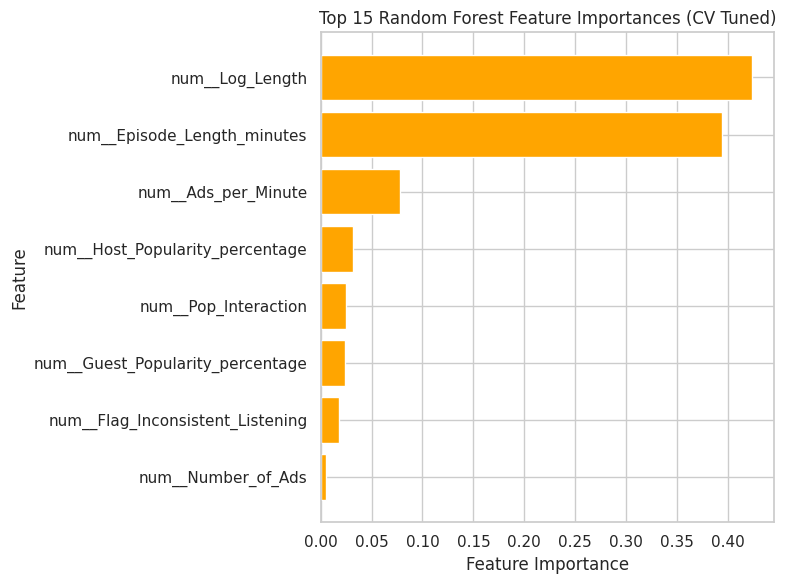

In [48]:
try:
    # Get the best estimator from RandomizedSearchCV
    best_rf_estimator = rs_rf.best_estimator_

    pre = best_rf_estimator.named_steps['pre']
    reg = best_rf_estimator.named_steps['reg'] # This is the RandomForestRegressor

    feat_names = (pre.get_feature_names_out()
                  if hasattr(pre, "get_feature_names_out")
                  else np.array([f"feat_{i}" for i in range(reg.n_features_in_)]))

    importances = reg.feature_importances_
    fi = (pd.DataFrame({'Feature': feat_names, 'Importance': importances})
            .sort_values('Importance', ascending=False)
            .reset_index(drop=True))
    print("Top 15 feature importances (Random Forest CV tuned):")
    print(fi.head(15).to_string(index=False))
except Exception as e:
    print(f"Could not extract RF importances: {e}")
    fi = None

#  Plot top features
if fi is not None and not fi.empty:
    top_n = 15
    plt.figure(figsize=(8, 6))
    plt.barh(fi['Feature'][:top_n][::-1], fi['Importance'][:top_n][::-1], color='orange')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title(f"Top {top_n} Random Forest Feature Importances (CV Tuned)")
    plt.tight_layout()
    plt.show()
else:
    print("Skipping feature-importance plot (no importances available).")

### **Cross-Validation Comparison Summary**

Cross-Validation Comparison Summary
 Lasso (CV tuned, 5-fold) — Test metrics: MAE=9.536 | RMSE=12.400 | R²=0.784
 RandomForest (CV tuned, 5-fold) — Test metrics: MAE=9.100 | RMSE=11.706 | R²=0.807
Final Model Performance Comparison (sorted by MAE):


,Model,MAE,RMSE,R2
0,RandomForest,9.093192,11.618932,0.810076
1,"RandomForest (CV tuned, 5-fold)",9.100076,11.705866,0.807223
2,"Lasso (simple, no CV)",9.524398,12.360434,0.785061
3,"Lasso (CV tuned, 5-fold)",9.535839,12.400275,0.783673
4,LinearRegression,9.541237,12.358990,0.785111


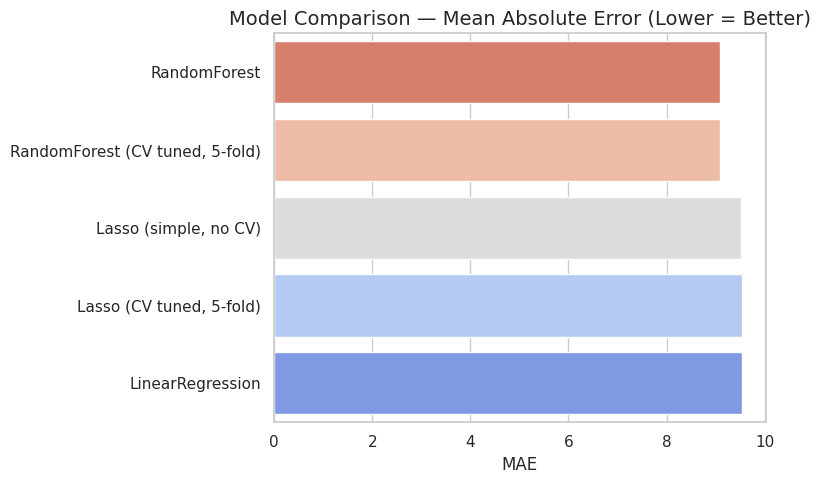

In [49]:
print("Cross-Validation Comparison Summary")

# Base models
results_rows = [
    {'Model': 'Linear (simple)',             **res_lin},
    {'Model': 'Lasso (simple, no CV)',       **res_lasso},
    {'Model': 'RandomForest (simple, no CV)', **res_rf},  # baseline RF
]

# Add tuned Lasso results (if available)
try:
    y_pred_lasso_cv = gs_lasso.predict(X_test)
    res_lasso_cv = eval_and_print("Lasso (CV tuned, 5-fold)", y_test, y_pred_lasso_cv)
    results_rows.append({'Model': 'Lasso (CV tuned, 5-fold)', **res_lasso_cv})
except Exception as e:
    print(f"Lasso CV results unavailable: {e}")

# Add tuned Random Forest results (if available)
try:
    y_pred_rf_cv = rs_rf.predict(X_test)
    res_rf_cv = eval_and_print("RandomForest (CV tuned, 5-fold)", y_test, y_pred_rf_cv)
    results_rows.append({'Model': 'RandomForest (CV tuned, 5-fold)', **res_rf_cv})
except Exception as e:
    print(f"Random Forest CV results unavailable: {e}")

# Create summary table
results_final = (
    pd.DataFrame(results_rows)[['Model', 'MAE', 'RMSE', 'R2']]
      .sort_values('MAE')
      .reset_index(drop=True)
)

print("Final Model Performance Comparison (sorted by MAE):")
display(results_final)

# Visualization (bar plot)
plt.figure(figsize=(8,5))
sns.barplot(data=results_final, x='MAE', y='Model', hue='Model', palette='coolwarm_r', legend=False)
plt.title("Model Comparison — Mean Absolute Error (Lower = Better)", fontsize=14)
plt.xlabel("MAE")
plt.ylabel("")
plt.tight_layout()
plt.show()

# **4. Interpretation of results and Insights**
This section summarizes the main findings from the model comparison and feature analysis.


The analysis shows that the Random Forest model remains the strongest predictor of listening time, achieving a Mean Absolute Error (MAE) of approximately 9.1 minutes and an $R^2$ of about 0.81. Even after applying feature reduction and 5-fold cross-validated tuning, ensemble-based approaches continue to outperform both Linear Regression and Lasso, which stabilize around MAE $\approx$ 9.5 with $R^2 \approx 0.785$. This performance gap indicates that podcast engagement cannot be fully captured through additive linear effects alone; non-linear relationships and conditional interactions , particularly those involving episode duration and advertising intensity play a central role in shaping listening behavior.

Feature importance analysis confirms that the dominant drivers of listening time are structural characteristics of episodes. Both the raw duration and its logarithmic transformation account for the majority of predictive power, reflecting the natural saturation effect whereby longer episodes yield more listening but with diminishing incremental returns. Advertising-related variables, especially Ads_per_Minute, show a persistent negative influence, suggesting that higher ad density reduces retention more strongly than simple ad presence. Popularity features, including the Pop_Interaction between host and guest, contribute modest but stable improvements, consistent with the idea that audience familiarity enhances engagement.

Despite the removal of categorical variables in the reduced feature set, the model maintains stable performance, indicating that genre and publication timing have smaller roles compared to structural and content-related factors. Temporal variables provide only minor gains, supporting the intuition that release schedules influence behavior slightly, while the core determinants remain episode format, perceived quality, and the burden of advertising.

Overall, the results align with behavioral expectations: well-paced episodes of appropriate length, with moderate advertisement levels and recognizable voices, tend to retain listeners more effectively. The CRISP-DM framework enabled a systematic and leakage-safe workflow, from data cleaning to feature engineering and model comparison, resulting in a predictive pipeline that balances accuracy, interpretability, and robustness for podcast listening-time estimation.